In [718]:
#!pip install missingno

In [719]:

import numpy as np
import os 
import pandas as pd
#from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
#import pyodbc
import seaborn as sns
sns.set()
#plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [720]:
df_panel = pd.read_pickle('df_panel.pkl')
df_panel['Reviews'] = df_panel['Reviews'].replace(0, np.nan)
# Get only the numerical columns
cols= [
    'Accomodates',
    'Bathrooms', 
    'Bedrooms', 
    'Beds', 
    'Guests Included', 
    'Min Nights', 
    'Reviews', 
    'Overall Rating', 
    'Accuracy Rating',
    'Cleanliness Rating', 
    'Checkin Rating', 
    'Communication Rating',
    'Location Rating', 
    'Value Rating' ,
    'Latitude' ,
    'Longitude'
      ]
numerical_df = df_panel[cols]
#numerical_df = df_panel.select_dtypes(include=['number'])
df_panel.columns

Index(['Listing ID', 'Listing Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'neighbourhood',
       'Neighborhood Group', 'City', 'Country Code', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Is Superhost_ind',
       'Is Exact Location_ind', 'Postal Code_n', 'Top10Neighbourhood',
       'Property Type_groups'],
      dtype='object')

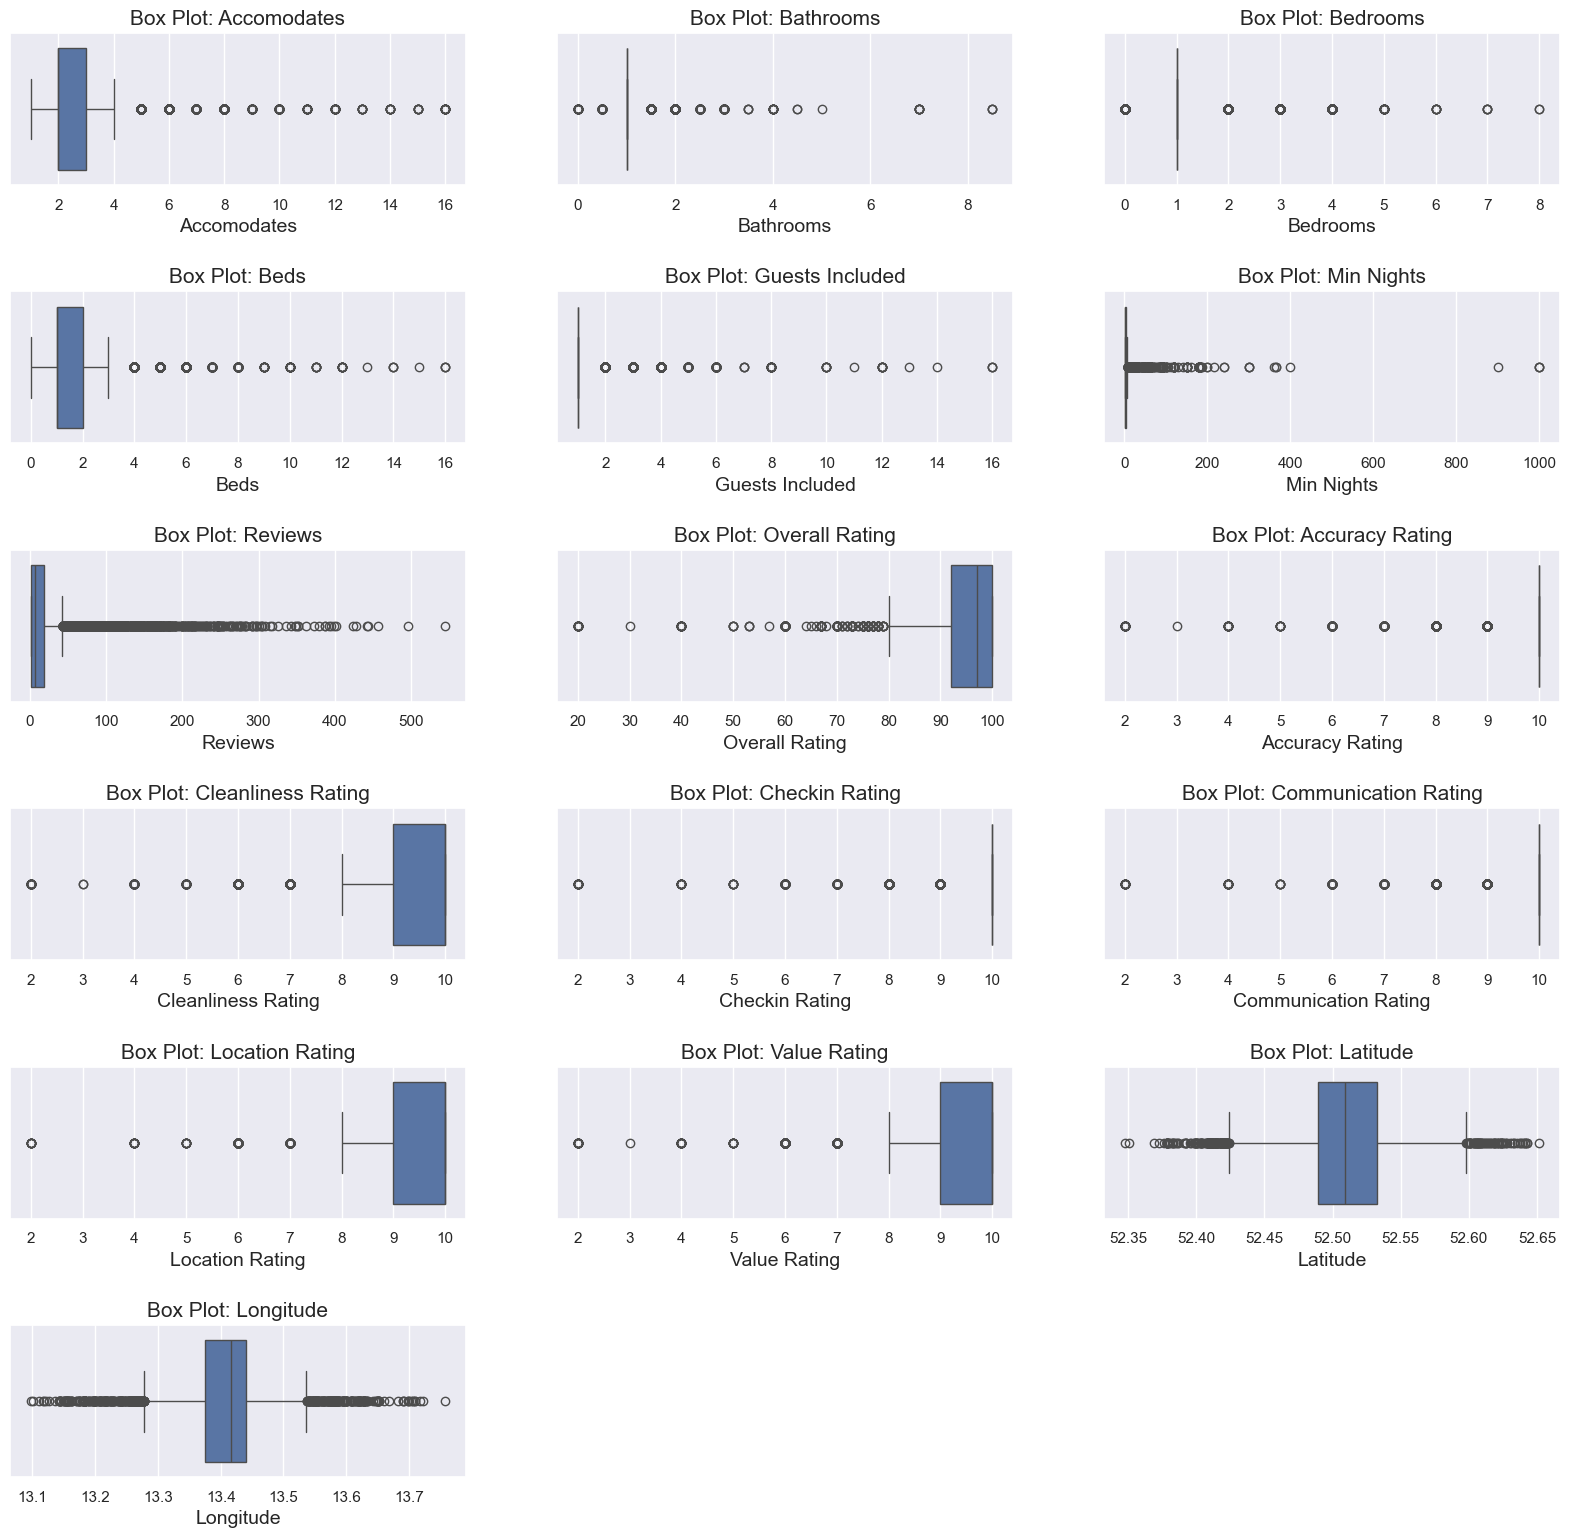

In [721]:
## Using box (Wiskers) plot 
plt.figure(figsize=(20,200))

def outliers_boxplot(animals):
    for i, col in enumerate(animals.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=animals, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(numerical_df)

Creating Nulls dataframe and matrix

In [722]:
df_nulls = df_panel.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,Listing Name,Host Name,Host Since,Host Response Time,Host Response Rate,City,Bathrooms,Bedrooms,Beds,Reviews,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Is Superhost_ind,Postal Code_n
65536,Central apartment near Alex (Apt. 9),Sven,2016-06-29,within a few hours,1.0,Berlin,1.0,2.0,4.0,118.0,...,2019-05-10,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,10179
65603,"SchÃ¶ne, helle Whg nahe Tempelh. Feld in NeukÃ...",Renald,2016-06-29,<NA>,NaN,Berlin,1.0,1.0,2.0,22.0,...,2018-02-18,96.0,10.0,9.0,10.0,10.0,9.0,10.0,0,12051
65625,Cozy and quiet Loft in Central Berlin,Sonja,2016-06-27,<NA>,NaN,Berlin,1.0,1.0,1.0,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10119
65626,"Cozy room in Berlin, Charlottenburg!",Eva,2016-03-12,<NA>,NaN,Berlin,1.0,1.0,1.0,1.0,...,2016-07-17,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,10589
65627,Small but nice and quite room,Janka,2015-11-27,<NA>,NaN,Berlin,1.0,1.0,1.0,7.0,...,2016-10-11,97.0,9.0,10.0,10.0,10.0,10.0,10.0,0,10407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456582,"Chillout-Oase fÃ¼r ""GroÃ und Klein""",Luca,2015-09-22,<NA>,NaN,Berlin,1.0,2.0,2.0,3.0,...,2016-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<NA>
456585,GemÃ¼tliches Zimmer zur Ãbernachtung,Anh,2015-08-06,<NA>,NaN,Berlin,1.0,1.0,1.0,20.0,...,2016-09-18,92.0,10.0,10.0,10.0,9.0,9.0,9.0,0,<NA>
456605,Potsdamer Platz-Top Spot Studio 1,Martin,2014-10-08,within an hour,1.0,Berlin,1.0,1.0,3.0,349.0,...,2019-04-28,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,<NA>
456954,Familyhome for your vacation,Simone,2013-03-17,<NA>,NaN,Berlin,1.5,4.0,6.0,4.0,...,2015-08-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,<NA>


<Axes: >

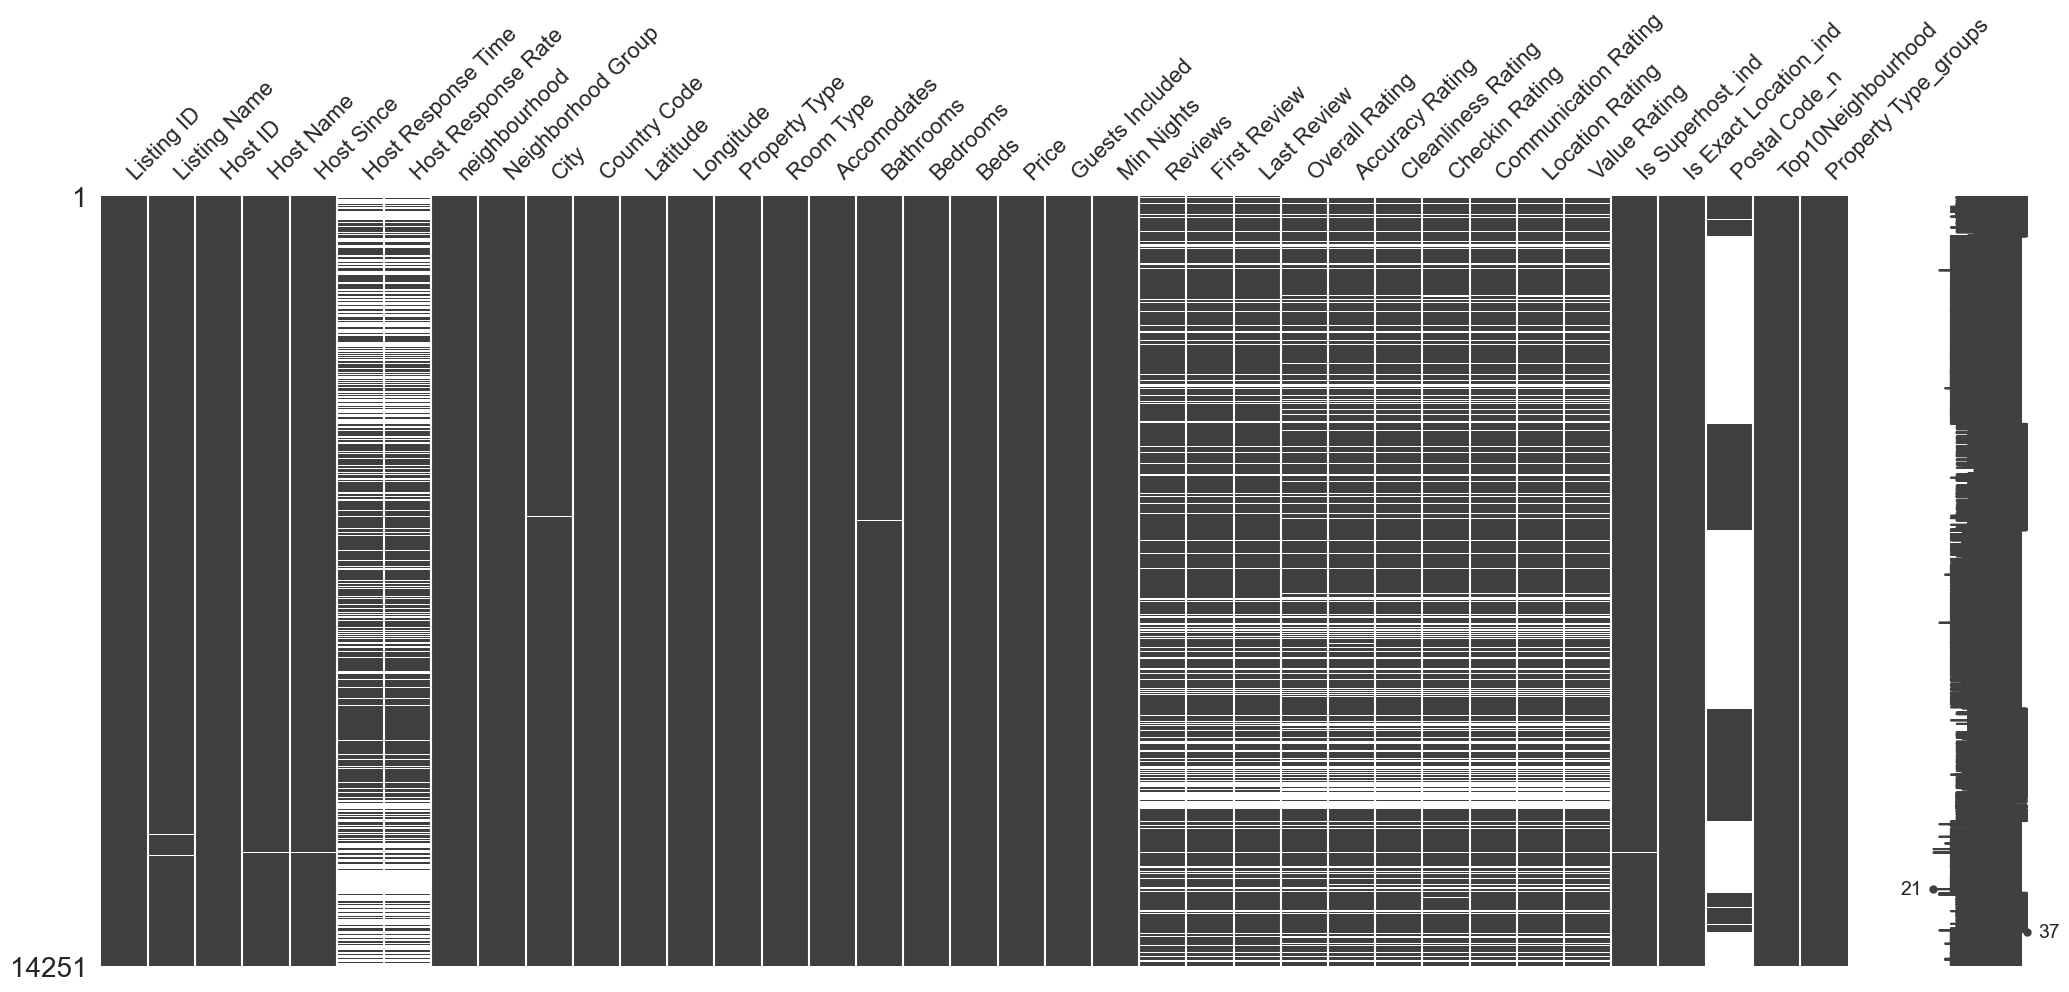

In [723]:

msno.matrix(df_panel)

In [724]:
mis_val = df_nulls.isna().sum()
mis_val_per = df_nulls.isna().sum()/len(df_nulls)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
Postal Code_n,8838,62.0
Host Response Time,5653,39.7
Host Response Rate,5653,39.7
Checkin Rating,3091,21.7
Value Rating,3090,21.7
Location Rating,3088,21.7
Communication Rating,3081,21.6
Accuracy Rating,3081,21.6
Cleanliness Rating,3077,21.6
Overall Rating,3067,21.5


<Axes: >

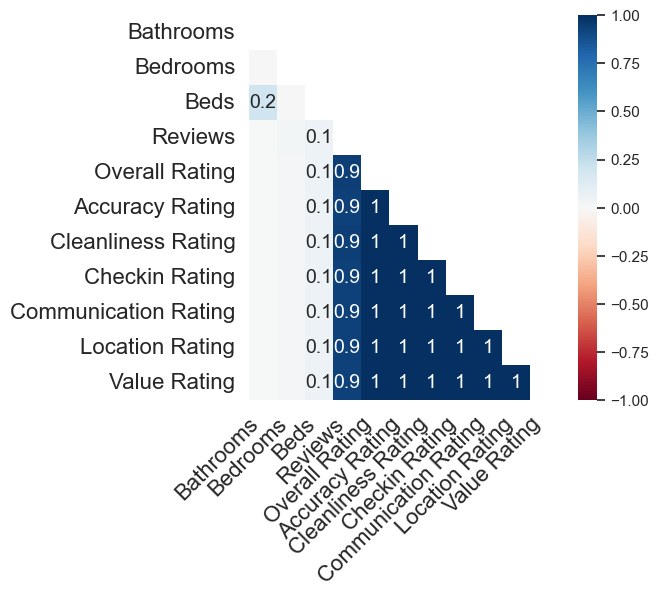

In [725]:

df_num_na=numerical_df.isna()
df_num_na
msno.heatmap(numerical_df,figsize=(5,5))

# Outliers

In [726]:
import pandas as pd

def total_outliers_df(df):
    # Corrected: Use a list for columns
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])
    
    for col in df.columns:
        if col != 'Price':
            temp = pd.DataFrame(df[col])
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            upper_limit = Q3 + 1.5 * (Q3 - Q1)
            lower_limit = Q1 - 1.5 * (Q3 - Q1)
            upper_outliers = temp[temp[col] > upper_limit]
            lower_outliers = temp[temp[col] < lower_limit]
            temp = pd.concat([upper_outliers, lower_outliers])
            
            # Use .loc to correctly assign values to the DataFrame
            total_outliers.loc[col] = [len(temp), len(temp)/len(df)*100]
    
    # Filter and sort the resulting DataFrame
    return total_outliers[total_outliers['Percent'] > 0]

# Example usage
# Replace numerical_df with your actual DataFrame
df_ttl_outliers = total_outliers_df(numerical_df).sort_values('Percent', ascending=False)
df_ttl_outliers

,Outlier count,Percent
Bedrooms,3628.0,25.457863
Guests Included,3216.0,22.566837
Accuracy Rating,2557.0,17.942601
Checkin Rating,2167.0,15.205950
Communication Rating,1984.0,13.921830
Bathrooms,1680.0,11.788646
Min Nights,1480.0,10.385236
Reviews,1339.0,9.395832
Accomodates,1307.0,9.171286
Beds,997.0,6.996000


In [727]:

df_ttl_outliers.to_csv('outliers_df.csv')

In [728]:
# Function to identify and treat outliers using IQR
def treat_outliers(df, features):
    df_outliers = pd.DataFrame(index=df.index)
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[feature] = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)
    return df_outliers

outliers_df=treat_outliers(df_panel,cols)
outliers_df

,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Latitude,Longitude
65536,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0
65603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65625,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
65626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65627,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456582,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
456585,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456605,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
456954,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [729]:
def capping(df):
    temp = df.copy()
    for col in temp:
        if col in df_ttl_outliers.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
cap_df = capping(df_panel)
cap_df.to_csv('outliers_cap_df.csv')
cap_df



,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,neighbourhood,Neighborhood Group,City,...,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Is Superhost_ind,Is Exact Location_ind,Postal Code_n,Top10Neighbourhood,Property Type_groups
65536,13761071,Central apartment near Alex (Apt. 9),80675177,Sven,2016-06-29,within a few hours,1.0,Mitte,Mitte,Berlin,...,10.0,10.0,10.0,10.0,9.0,1,1,10179,Mitte,Apartment
65603,13763834,"SchÃ¶ne, helle Whg nahe Tempelh. Feld in NeukÃ...",80714211,Renald,2016-06-29,<NA>,NaN,NeukÃ¶lln,NeukÃ¶lln,Berlin,...,9.0,10.0,10.0,9.0,10.0,0,1,12051,NeukÃ¶lln,Apartment
65625,13764102,Cozy and quiet Loft in Central Berlin,80179711,Sonja,2016-06-27,<NA>,NaN,Mitte,Mitte,Berlin,...,NaN,NaN,NaN,NaN,NaN,0,1,10119,Mitte,Apartment
65626,13764166,"Cozy room in Berlin, Charlottenburg!",62639492,Eva,2016-03-12,<NA>,NaN,Charlottenburg,Charlottenburg-Wilm.,Berlin,...,10.0,10.0,10.0,10.0,10.0,0,1,10589,Charlottenburg,Apartment
65627,13765505,Small but nice and quite room,49985648,Janka,2015-11-27,<NA>,NaN,Prenzlauer Berg,Pankow,Berlin,...,10.0,10.0,10.0,10.0,10.0,0,0,10407,Prenzlauer Berg,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456582,9991497,"Chillout-Oase fÃ¼r ""GroÃ und Klein""",44816934,Luca,2015-09-22,<NA>,NaN,NiederschÃ¶neweide,Treptow - KÃ¶penick,Berlin,...,NaN,NaN,NaN,NaN,NaN,0,0,<NA>,Other,Apartment
456585,9993168,GemÃ¼tliches Zimmer zur Ãbernachtung,40660291,Anh,2015-08-06,<NA>,NaN,Rummelsburg,Lichtenberg,Berlin,...,10.0,10.0,NaN,9.0,9.0,0,0,<NA>,Other,Apartment
456605,9994644,Potsdamer Platz-Top Spot Studio 1,22276081,Martin,2014-10-08,within an hour,1.0,Kreuzberg,Friedrichshain-Kreuzberg,Berlin,...,10.0,10.0,10.0,10.0,10.0,1,1,<NA>,Kreuzberg,Apartment
456954,999465,Familyhome for your vacation,5494219,Simone,2013-03-17,<NA>,NaN,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,...,10.0,10.0,10.0,10.0,10.0,0,0,<NA>,Friedrichshain,Apartment


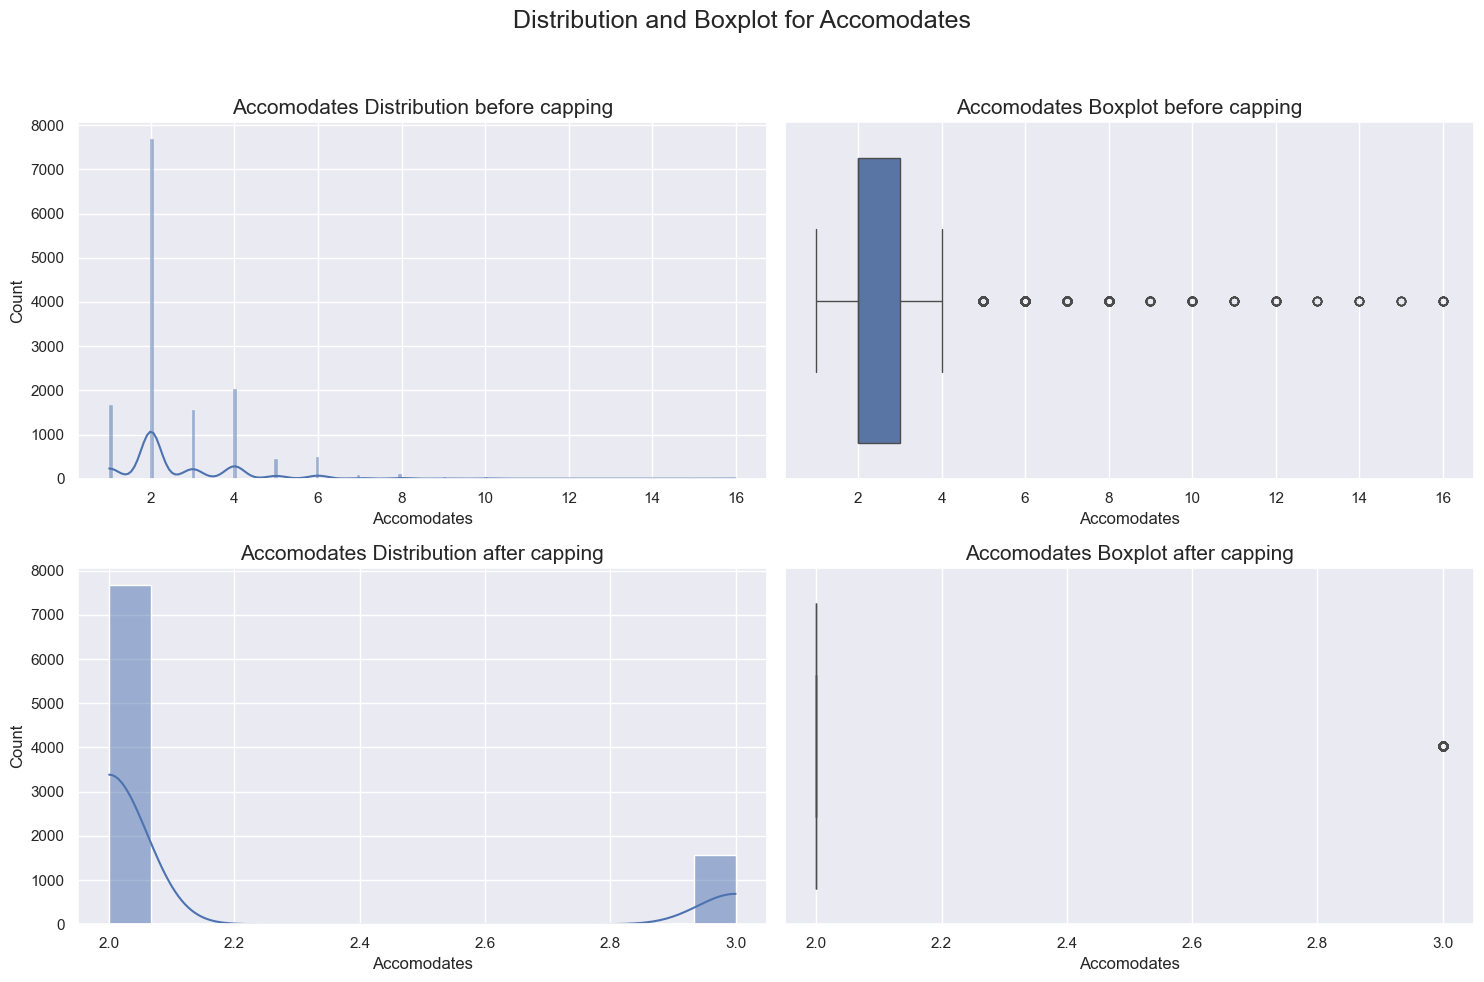

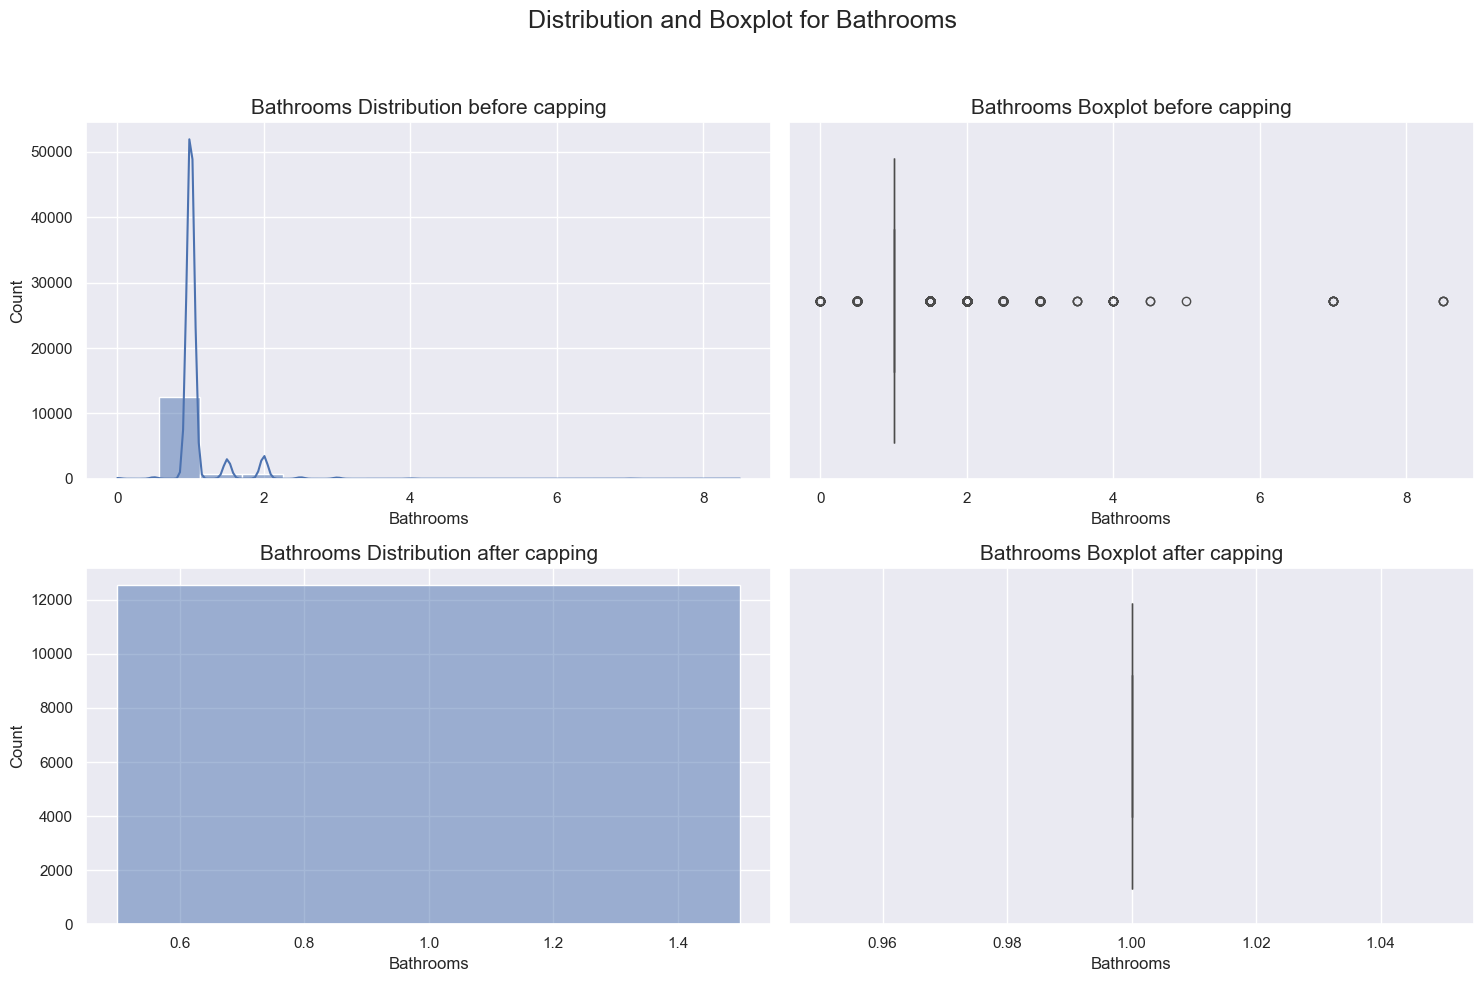

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def dist_outliers(original_df, capped_df, cols):
    # Iterate over the specified columns
    for col in cols:
        # Set up the figure with a fixed size
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Distribution and Boxplot for {col}', fontsize=18)

        # Original distribution
        sns.histplot(original_df[col], ax=axes[0, 0], kde=True)
        axes[0, 0].set_title(f'{col} Distribution before capping', fontsize=15)

        # Original boxplot
        sns.boxplot(x=original_df[col], ax=axes[0, 1])
        axes[0, 1].set_title(f'{col} Boxplot before capping', fontsize=15)

        # Capped distribution
        sns.histplot(capped_df[col], ax=axes[1, 0], kde=True)
        axes[1, 0].set_title(f'{col} Distribution after capping', fontsize=15)

        # Capped boxplot
        sns.boxplot(x=capped_df[col], ax=axes[1, 1])
        axes[1, 1].set_title(f'{col} Boxplot after capping', fontsize=15)

        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
        plt.show()


dist_outliers(df_panel,cap_df,cols)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def bin_numerical_columns(df, cols, outlier_threshold=1.5):
    binned_columns = {}

    for col in cols:
        # Calculate the IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine the number of bins based on the distribution
        num_bins = int(np.ceil(np.log2(len(df[col].dropna())) + 1))

        # Define bin edges
        bins = pd.qcut(df[col], q=num_bins, duplicates='drop', retbins=True)[1]
        
        # Extend bins to include outliers
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR
        bins = np.append(bins, [lower_bound, upper_bound])
        bins = np.unique(bins)

        # Bin the column
        binned_columns[col] = pd.cut(df[col], bins=bins, include_lowest=True)
        
        # Plot the original and binned distribution
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        sns.distplot(df[col].dropna())
        plt.title(f'{col} Distribution')
        plt.subplot(1, 2, 2)
        sns.countplot(binned_columns[col])
        plt.title(f'{col} Binned Distribution')
        plt.xticks(rotation=45)
        plt.show()

    return pd.DataFrame(binned_columns)

# Example usage
cols_bin=['Bedrooms', 'Guests Included', 'Bathrooms', 'Min Nights', 'Accomodates', 'Beds']
binned_df = bin_numerical_columns(df_panel, cols_bin)


In [ ]:
#Creating a table for outliers change

#out_df

In [ ]:
# Checking distribution and correlation changes
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
for col in numeric_cols:
    out = df_panel[col]
    non_out = df_panel[col][outliers_df[col] == 0]
    cor_out = df_panel['Price']
    cor_non_out = df_panel['Price'][outliers_df[col] == 0]
    
    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)
    
    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] - 
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    new_row = pd.DataFrame({'feature': [col],
                            'outliers_cnt': [outliers_df[col].sum()],
                            'distribution_changed': [dist_change],
                            'correlation_changed': [cor_change]})

    out_df = pd.concat([out_df, new_row], ignore_index=True)

In [ ]:
out_df

In [ ]:
# Filter features where only distribution changes but not correlation
out_df['drop'] = np.where((out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'), 'yes', 'no')
out_df

### Outlier Handling Strategy

I chose not to remove the ratings columns, as ratings should be treated like categories, with all values between 1-10 being valid.

For the columns `Accommodates`, `Bathrooms`, `Bedrooms`, `Beds`, `Guests Included`, and `Min Nights`, I opted to create new columns with bins. This approach reduces the impact of outliers by grouping extreme values together, (see in the feature engineering part).

For the `Longitude` column, I decided not to remove outliers to avoid losing information on listings in distant locations, which could influence the price.

For the `Reviews` column, I chose to remove outliers and cap the values at the upper boundary.



In [ ]:
to_drop = ['Reviews']

In [ ]:
# Remove outliers
df_cleaned = df_panel.copy()
for col in to_drop:
    df_cleaned.loc[outliers_df[col] == 1, col] = np.nan

In [ ]:
# Save cleaned data
df_cleaned.to_pickle('df_cleaned.pkl')

# Missing Values 

In [ ]:
df_nulls = df_panel.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

In [ ]:

msno.matrix(df_panel)

In [ ]:

df_num_na=numerical_df.isna()
df_num_na
msno.heatmap(numerical_df,figsize=(5,5))

In [ ]:
mis_val = df_nulls.isna().sum()
mis_val_per = df_nulls.isna().sum()/len(df_nulls)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

In [ ]:

#dates columns i will deal later
#df_nulls[['Host Since', 'Last Review' , 'First Review']]

categorical_columns = df_nulls.select_dtypes(include=['string']).columns
print(categorical_columns)
categorical_columns = df_nulls.select_dtypes(include=['string']).columns

In [ ]:
 # for the rating columns I will use  
df_nulls_numerical = df_cleaned.select_dtypes(include=['int64', 'float64'])
df_missing_data = df_cleaned.isin([np.nan]) 
df_missing_data = df_missing_data.astype('int')
df_missing_data

In [ ]:
# Initialize an empty DataFrame
MV_df_final = pd.DataFrame(columns=['Var', 'MV_pct', 'distribution_changed'])

# Create a copy of the numerical columns from df_nulls
m = df_nulls_numerical.copy()

# Set error handling for numpy operations
np.seterr(divide='ignore', invalid='ignore')

# Loop through the numerical columns
for i in m:
    # Column with NULLS
    null = m[i]
    
    # Column without NULLS
    non = m[i].loc[df_missing_data[i] == 0]
    
    # Target value with NULLS
    price_null = m['Price']
    
    # Target value without NULLS
    price_non = superhost_null.loc[df_missing_data[i] == 0]
    
    # Calculate the missing value count
    mv = df_missing_data[i].sum()
    
    # Perform Kolmogorov-Smirnov test
    pval = ks_2samp(null, non)[1]
    dis_change = np.where(pval < 0.5, '+', '-')
    
    # Append results using pd.concat
    new_row = pd.DataFrame({'Var': [i], 'MV_pct': [mv], 'distribution_changed': [dis_change]})
    MV_df_final = pd.concat([MV_df_final, new_row], ignore_index=True)

MV_df_final


In [ ]:
MV_df_final['drop']= 'Yes'
MV_df_final['MV_type']= 'MCAR/MAR'
MV_df_final.loc[(MV_df_final.distribution_changed== '+'),'drop']='No'
MV_df_final.loc[(MV_df_final.distribution_changed== '+'),'MV_type']='MNAR'
MV_df_final = MV_df_final[MV_df_final['MV_pct']>0].sort_values(by='MV_pct', ascending=False)
MV_df_final

In [ ]:
df_cleaned.info()
#df_cleaned['Host Response Rate'].value_counts()
#df_cleaned['Overall Rating']

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Create a copy of the cleaned DataFrame
not_missing_df = df_cleaned.copy()

# Select columns with numeric data types
imp_cols = not_missing_df.select_dtypes(include=['float64','int64']).columns

# Check if imp_cols has any columns
if imp_cols.empty:
    raise ValueError("No numeric columns found for imputation.")

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=1)

# Ensure that the DataFrame contains numerical columns only
numeric_data = not_missing_df[imp_cols]

# Check for any missing values in the selected columns
print("Columns with missing values before imputation:")
print(numeric_data.isnull().sum())

# Impute missing values
imputed_array = knn_imputer.fit_transform(numeric_data)

# Create a DataFrame from the imputed array with the same columns
imputed_data = pd.DataFrame(imputed_array, columns=imp_cols)

# Verify that imputation was successful
print("Columns with missing values after imputation:")
print(imputed_data.isnull().sum())




In [ ]:
imputed_data

In [ ]:
sns.heatmap(imputed_data) 

In [ ]:
# Sort both DataFrames by their index
not_missing_df = not_missing_df.sort_index()
imputed_data = imputed_data.sort_index()

# Now, update the columns
not_missing_df[imp_cols] = imputed_data.values

In [ ]:
not_missing_df.info()

In [ ]:

not_missing_df['City'].fillna('Berlin', inplace=True)
#For now, I've decided to fill the missing values in the `City` column with the name 'Berlin'.
#I'm strongly considering dropping the column in the next step.

In [ ]:
def replace_nulls_with_missing(df, columns):
    for col in columns:
        df[col].fillna('Missing', inplace=True)

# Example usage:
columns_to_fill = ['Host Name', 'Listing Name', 'Host Response Time']
replace_nulls_with_missing(not_missing_df, columns_to_fill)

In [ ]:
columns_with_nulls = not_missing_df.columns[not_missing_df.isnull().any()].tolist()
columns_with_nulls
#The missing values in the dates column will be handled in the feature engineering step.

In [ ]:
not_missing_df.to_pickle('step_3_df.pkl')